In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Data

In [ ]:
# make the data more readable and index the col 0
df_in = pd.read_csv("/content/Consumer_Airfare_Report__Table_3_-_City-Pair_Markets_With_A_Substantial_Increase_In_Average_Fare_20250421.csv",index_col = 0)
df_de = pd.read_csv("/content/Consumer_Airfare_Report__Table_4_-_City-Pair_Markets_With_A_Substantial_Decrease_In_Average_Fare_20250421.csv",index_col = 0)
data = pd.concat([df_in, df_de], axis=0)
data

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,Geocoded_City1,Geocoded_City2
tbl,,,,,,,,,,,,,,,,
Table 3,2024,4,30189,30466,"Colorado Springs, CO","Phoenix, AZ",34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,NaN,NaN
Table 3,2024,4,30189,32211,"Colorado Springs, CO","Las Vegas, NV",29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,NaN,NaN
Table 3,2024,4,30189,32575,"Colorado Springs, CO","Los Angeles, CA (Metropolitan Area)",24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,NaN,NaN
Table 3,2024,4,30325,31136,"Denver, CO","Jacksonville, FL",40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,NaN,NaN
Table 3,2024,4,30397,30647,"Atlanta, GA (Metropolitan Area)","Cleveland, OH (Metropolitan Area)",82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Table 4,1996,1,33198,34614,"Kansas City, MO","Salt Lake City, UT",23220,84.60,160.03,10010,-75.43,-0.4714,13210,1.3197,"Kansas City, MO\n(39.099792, -94.578559)","Salt Lake City, UT\n(40.758478, -111.888142)"
Table 4,1996,1,33316,30466,"Omaha, NE","Phoenix, AZ",53690,77.52,130.85,39220,-53.34,-0.4076,14470,0.3689,"Omaha, NE\n(46.07035, -93.666319)","Phoenix, AZ\n(30.406931, -87.217578)"
Table 4,1996,1,33316,31123,"Omaha, NE","St. Louis, MO",15160,113.64,188.65,12860,-75.00,-0.3976,2300,0.1788,"Omaha, NE\n(46.07035, -93.666319)","St. Louis, MO\n(38.630276, -90.200309)"


In [ ]:
data.city1.value_counts()

,count
city1,
"Atlanta, GA (Metropolitan Area)",511
"Chicago, IL",397
"Boston, MA (Metropolitan Area)",326
"Dallas/Fort Worth, TX",306
"Denver, CO",294
...,...
"Plattsburgh, NY",1
"Bullhead City, AZ",1
"Richmond, VA",1


In [ ]:
data.citymarketid_1.value_counts()
# looks like the the name and market ID repreent the same thing according to the value count

,count
citymarketid_1,
30397,511
30977,397
30721,326
30194,306
30325,294
...,...
34025,1
30590,1
34524,1


In [ ]:
data.city2.value_counts()

,count
city2,
"Washington, DC (Metropolitan Area)",374
"Philadelphia, PA",284
"New York City, NY (Metropolitan Area)",281
"Minneapolis/St. Paul, MN",238
"Phoenix, AZ",229
...,...
"Fresno, CA",1
"Traverse City, MI",1
"Durango, CO",1


In [ ]:
data.citymarketid_2.value_counts()

,count
citymarketid_2,
30852,374
34100,284
31703,281
31650,238
30466,229
...,...
31638,1
35380,1
30285,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6262 entries, Table 3 to Table 4
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6262 non-null   int64  
 1   quarter             6262 non-null   int64  
 2   citymarketid_1      6262 non-null   int64  
 3   citymarketid_2      6262 non-null   int64  
 4   city1               6262 non-null   object 
 5   city2               6262 non-null   object 
 6   cur_passengers      6262 non-null   int64  
 7   cur_fare            6262 non-null   float64
 8   ly_fare             6262 non-null   float64
 9   ly_passengers       6262 non-null   int64  
 10  amount_change       6262 non-null   float64
 11  percent_change      6262 non-null   float64
 12  amount_change_pax   6262 non-null   int64  
 13  percent_change_pax  6262 non-null   float64
 14  Geocoded_City1      3835 non-null   object 
 15  Geocoded_City2      3835 non-null   object 
dtypes:

### Data Cleaning


In [ ]:
#delete the colunms, quarter, citymarketid_1, citymarketid_2, Geocoded_City1, Geocoded_City2
data_clean = data.drop(['citymarketid_1', 'citymarketid_2', 'Geocoded_City1', 'Geocoded_City2'], axis=1, inplace=False)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6262 entries, Table 3 to Table 4
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6262 non-null   int64  
 1   quarter             6262 non-null   int64  
 2   city1               6262 non-null   object 
 3   city2               6262 non-null   object 
 4   cur_passengers      6262 non-null   int64  
 5   cur_fare            6262 non-null   float64
 6   ly_fare             6262 non-null   float64
 7   ly_passengers       6262 non-null   int64  
 8   amount_change       6262 non-null   float64
 9   percent_change      6262 non-null   float64
 10  amount_change_pax   6262 non-null   int64  
 11  percent_change_pax  6262 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 636.0+ KB


In [ ]:
#join 'city1' and 'city2' columns into a new column 'route'
data_clean['route'] = data_clean['city1'].astype(str) + ' - ' + data_clean['city2'].astype(str)

# Reorder the columns
cols = list(data_clean.columns)
cols.insert(1, cols.pop(cols.index('route')))  # Move 'city_pair' to the second position
data_clean = data_clean[cols]

# Delete the 'city1' and 'city2' columns
data_clean = data_clean.drop(['city1', 'city2'], axis=1)


# Display the updated DataFrame
data_clean.head()


,Year,route,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax
tbl,,,,,,,,,,,
Table 3,2024,"Colorado Springs, CO - Phoenix, AZ",4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233
Table 3,2024,"Colorado Springs, CO - Las Vegas, NV",4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417
Table 3,2024,"Colorado Springs, CO - Los Angeles, CA (Metrop...",4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209
Table 3,2024,"Denver, CO - Jacksonville, FL",4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705
Table 3,2024,"Atlanta, GA (Metropolitan Area) - Cleveland, O...",4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402


In [ ]:
# hot encode route and join it the the main df with binay feture. to predict popular destination
city_pairs = pd.get_dummies(data_clean['route'],prefix= "route")
data_clean = pd.concat([data_clean, city_pairs], axis=1)
data_clean  = data_clean.drop(['route'], axis=1)
data_clean.head()

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,...,"route_Tallahassee, FL - Tampa, FL (Metropolitan Area)","route_Tallahassee, FL - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - Toledo, OH","route_Tampa, FL (Metropolitan Area) - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - West Palm Beach/Palm Beach, FL","route_Trenton, NJ - West Palm Beach/Palm Beach, FL","route_Tulsa, OK - Washington, DC (Metropolitan Area)","route_Valparaiso, FL - Washington, DC (Metropolitan Area)","route_Washington, DC (Metropolitan Area) - West Palm Beach/Palm Beach, FL","route_Washington, DC (Metropolitan Area) - Wichita, KS"
tbl,,,,,,,,,,,,,,,,,,,,,
Table 3,2024,4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#find the dtype of Colorado Springs, CO - Phoenix, AZ
data_clean['route_Tallahassee, FL - Tampa, FL (Metropolitan Area)'].dtype


dtype('bool')

In [ ]:
# removed extream outliers 1
df_trimmed = data_clean[(data_clean['cur_fare'] > data_clean['cur_fare'].quantile(0.01)) &
                (data_clean['cur_fare'] < data_clean['cur_fare'].quantile(0.99))]
# removed extream outliers 2
df1_trimmed = data_clean[(data_clean['cur_passengers'] > data_clean['cur_passengers'].quantile(0.01)) &
                (data_clean['cur_passengers'] < data_clean['cur_passengers'].quantile(0.99))]

### Data exploration

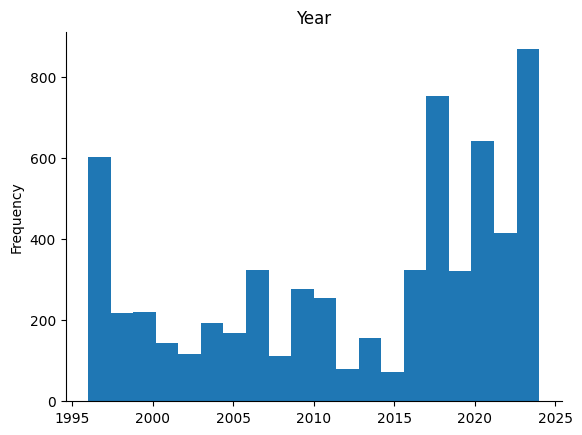

In [ ]:
data_clean['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

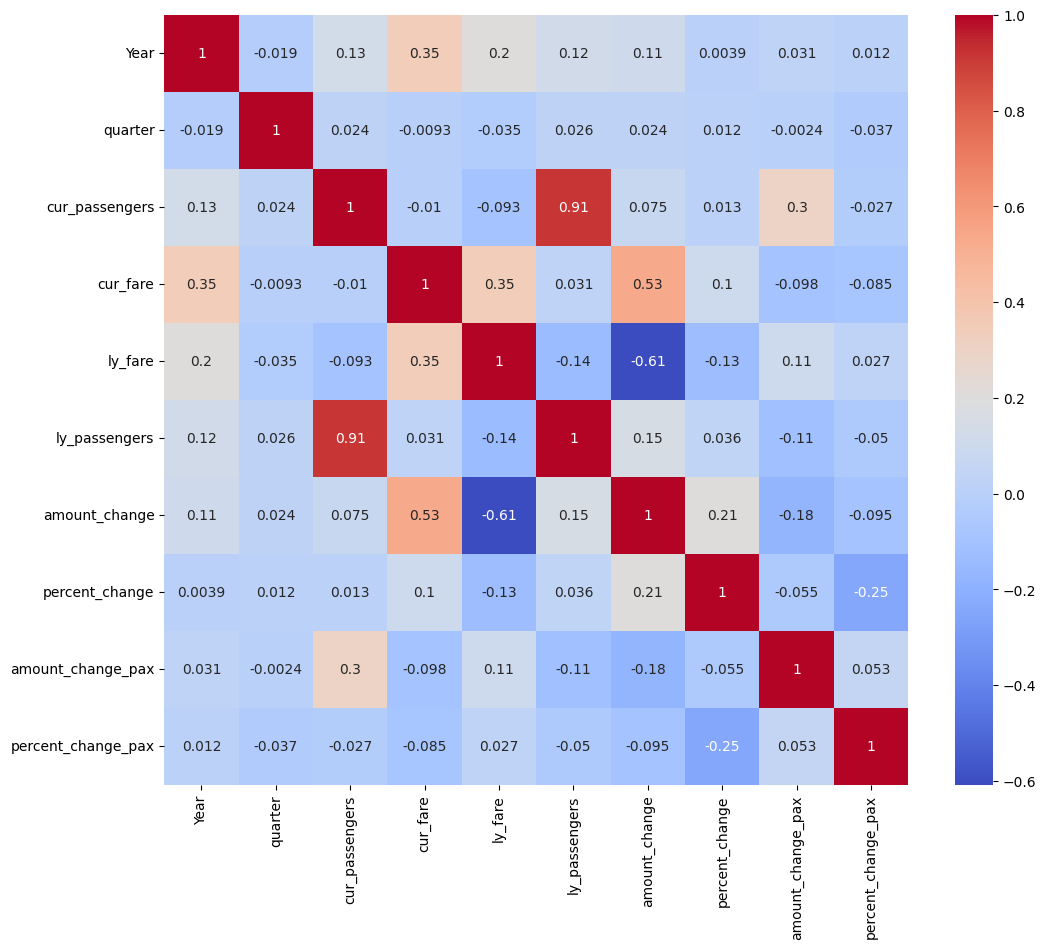

In [ ]:
#make matrix plot with matplotlib
plt.figure(figsize=(12, 10))
# Select only numerical features for correlation analysis
numerical_data = data_clean.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Current passegers vs. Current passaengers')

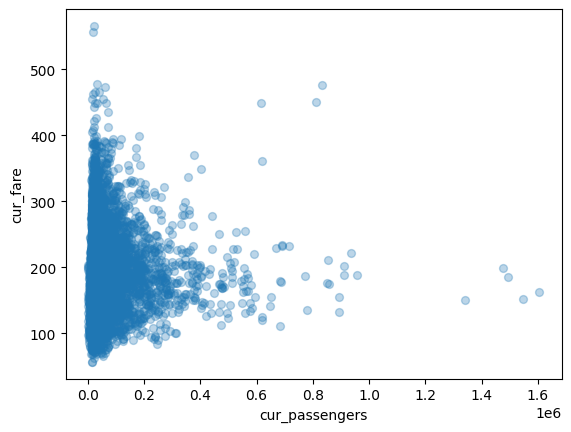

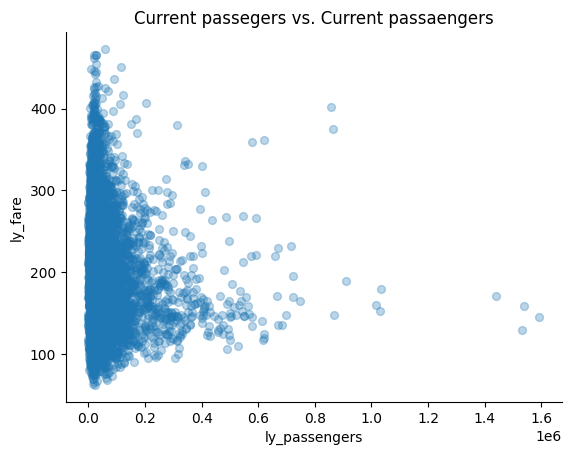

In [ ]:
# @title plot cur_passengers vs cur_fare and ly passenger and ly fare
data_clean.plot(kind='scatter', x='cur_passengers', y='cur_fare', s=32, alpha=.3)
data_clean.plot(kind='scatter', x='ly_passengers', y='ly_fare', s=32, alpha=.3)
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.title('Current passegers vs. Current passaengers')


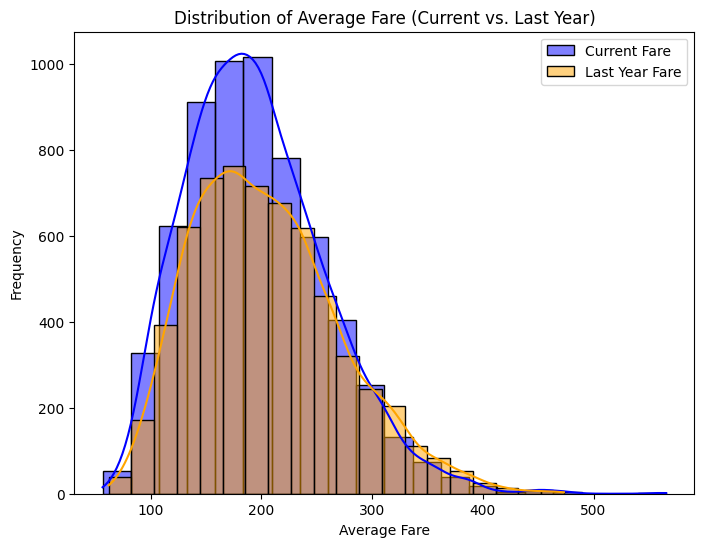

In [ ]:
# plot
plt.figure(figsize=(8, 6))
# histograms with distinct colors and labels
sns.histplot(data_clean['cur_fare'], bins=20, kde=True, color='blue', label='Current Fare')
sns.histplot(data_clean['ly_fare'], bins=20, kde=True, color='orange', label='Last Year Fare')

plt.title('Distribution of Average Fare (Current vs. Last Year)')
plt.xlabel('Average Fare')
plt.ylabel('Frequency')

# Add a legend for clarity
plt.legend()

plt.show()

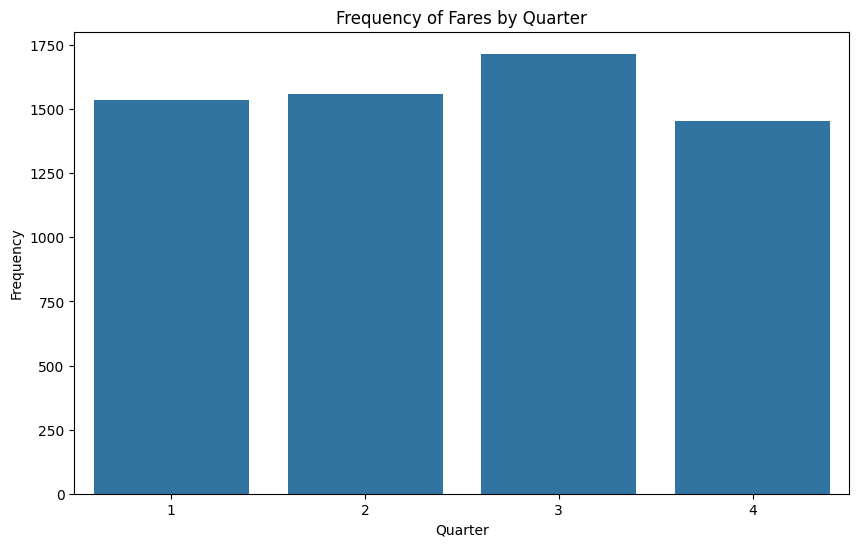

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

sns.countplot(x='quarter', data=data_clean)

plt.title('Frequency of Fares by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Frequency')

plt.show()

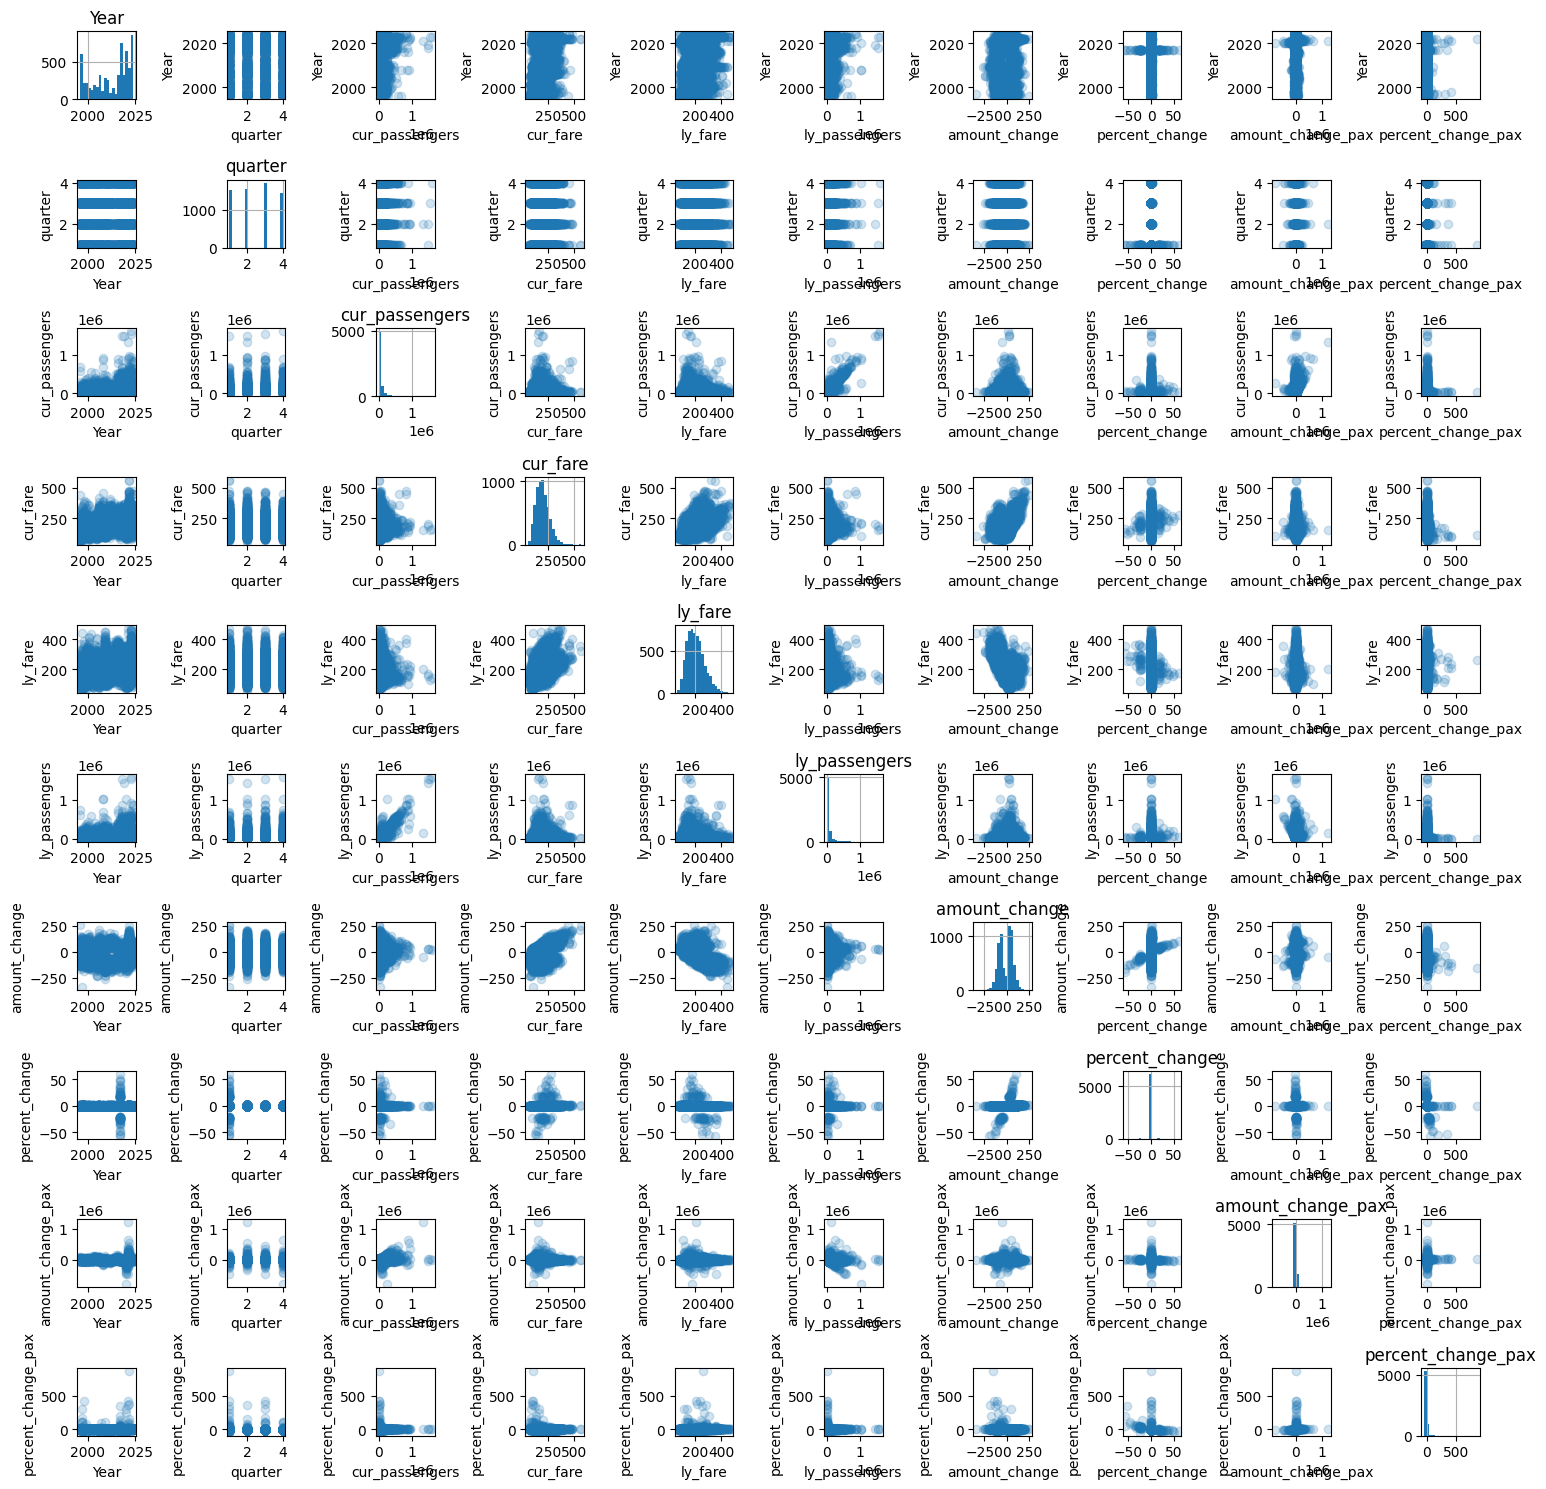

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Select numerical columns for the histogram matrix
numerical_cols = data_clean.select_dtypes(include=['number']).columns

# Create a figure and subplots
num_cols = len(numerical_cols)
fig, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(15, 15))

# Iterate through columns and plot histograms
for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols):
        ax = axes[i, j]  # Get the current subplot
        if i == j:  # Diagonal: Plot histogram
            data_clean[col1].hist(ax=ax, bins=20)
            ax.set_title(col1)  # Set title to column name
        else:  # Off-diagonal: Plot scatter plot (or other relationship)
            ax.scatter(data_clean[col2], data_clean[col1], alpha=0.2)  # Example: Scatter plot
            ax.set_xlabel(col2)
            ax.set_ylabel(col1)

# Adjust layout and display
plt.tight_layout()
plt.show()